In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

flores_ferts = pd.read_csv('model_fertilities.csv').drop(columns=['Unnamed: 0'])
flores_ferts.head()

,language,fertility,tokens,model
0,Cyrl,5.402301,"['▁', 'Дүшә', 'м', 'б', 'е', '▁', 'С', 'т', 'э...",flan-t5-xxl
1,Khm,5.829346,"['▁', 'កាល', '▁', 'ពី', '▁', 'ថ្ងៃ', '▁', 'ច័ន...",flan-t5-xxl
2,Nk,2.077179,"['▁', 'ߟߐ߲ߞߏߕߌ߮', '▁', 'ߟߎ߬', '▁', 'ߓߘߊ߫', '▁'...",flan-t5-xxl
3,Ge,2.193156,"['▁', 'ორშაბათს', ',', '▁', 'სტენფორდის', '▁',...",flan-t5-xxl
4,Heb,2.150794,"['▁', 'ביום', '▁', 'שני', ',', '▁', 'מדענים', ...",flan-t5-xxl


In [2]:
model_summaries = flores_ferts.groupby('model')['fertility'].describe()
model_summaries

,count,mean,std,min,25%,50%,75%,max
model,,,,,,,,
Llama-3.2-1B-Instruct,31.0,16.422128,14.790794,2.402349,8.412023,12.358785,16.518693,72.014839
Pangea-7B,31.0,13.045482,10.661878,2.400613,6.380682,9.187998,16.370472,48.148746
Phi-3.5-mini-instruct,31.0,19.731495,16.967171,2.618073,8.457879,12.159142,25.789270,62.217310
aya-101,31.0,6.329727,7.314511,2.104427,2.600421,3.012729,6.108890,30.143799
bloomz-7b1,31.0,11.939275,12.950681,1.514487,2.258471,6.058881,16.073491,44.211665
flan-t5-xxl,31.0,2.602669,1.048444,2.040513,2.090918,2.143660,2.222407,5.829346
gemma-2-9b,31.0,8.476900,7.593213,2.120740,3.635907,5.591380,9.177739,28.918156
gemma-7b,31.0,8.476900,7.593213,2.120740,3.635907,5.591380,9.177739,28.918156
mt0-xxl-mt,31.0,6.329727,7.314511,2.104427,2.600421,3.012729,6.108890,30.143799


In [3]:
models = flores_ferts['model'].unique()
values = []
for model in models:
    subset = flores_ferts[flores_ferts['model']==model]
    values.append(np.array(subset['fertility']))

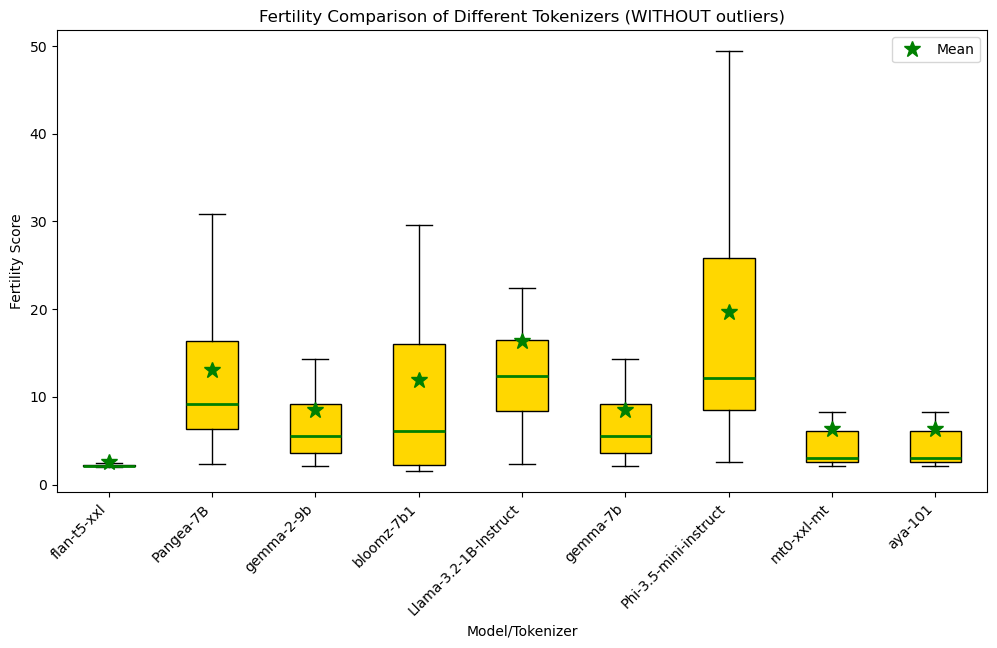

In [4]:
plt.figure(figsize=(12, 6))

boxprops = dict(facecolor='gold', color='black') 
medianprops = dict(color='green', linewidth=2)  

plt.boxplot(
    values,
    labels=models,
    vert=True,
    patch_artist=True,
    boxprops=boxprops,
    medianprops=medianprops,
    showfliers=False
)

for i, data in enumerate(values, start=1):
    mean = np.mean(data)
    plt.plot(i, mean, 'g*', markersize=12, label='Mean' if i == 1 else "")  
plt.legend(loc='upper right')

plt.xticks(rotation=45, ha='right')
plt.title('Fertility Comparison of Different Tokenizers (WITHOUT outliers)')
plt.xlabel('Model/Tokenizer')
plt.ylabel('Fertility Score')
plt.show()

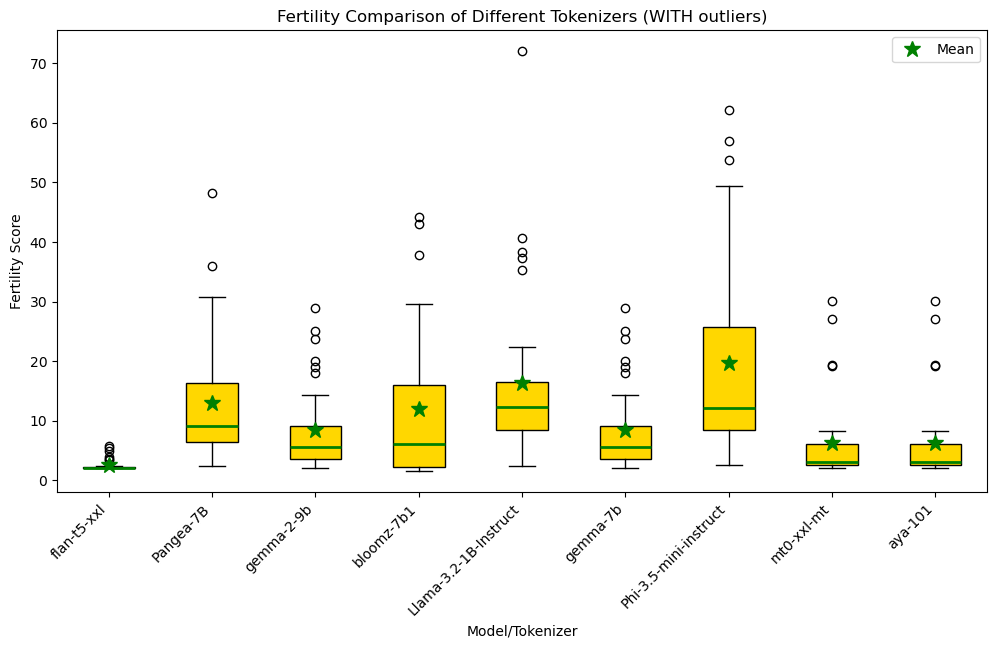

In [5]:
plt.figure(figsize=(12, 6))

boxprops = dict(facecolor='gold', color='black') 
medianprops = dict(color='green', linewidth=2)  

plt.boxplot(
    values,
    labels=models,
    vert=True,
    patch_artist=True,
    boxprops=boxprops,
    medianprops=medianprops,
    showfliers=True
)

for i, data in enumerate(values, start=1):
    mean = np.mean(data)
    plt.plot(i, mean, 'g*', markersize=12, label='Mean' if i == 1 else "")  
plt.legend(loc='upper right')

plt.xticks(rotation=45, ha='right')
plt.title('Fertility Comparison of Different Tokenizers (WITH outliers)')
plt.xlabel('Model/Tokenizer')
plt.ylabel('Fertility Score')
plt.show()